# 6) Design a model for MNIST hand written digit classification using Deep Convolution Neural networks.

In [2]:
#Importing Packages
import keras
from keras.models import Sequential
from keras.layers import Dense , Flatten
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
#Import the Dataset
from keras.datasets import mnist
(train_img , train_lab) , (test_img , test_lab) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#Normalize Dataset
train_img = keras.utils.normalize(train_img , axis=1)
test_img = keras.utils.normalize(test_img , axis=1)

In [5]:
#Building the Model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [6]:
#Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#Compiling the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [8]:
#Fitting Model
model.fit(train_img , train_lab , epochs=10)
model.save('model.h5')

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2204 - accuracy: 0.9331
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0909 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0624 - accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0468 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0374 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0213 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
#Evaluation of Model
print(model.evaluate(test_img , test_lab))

313/313 [==============================] - 2s 4ms/step - loss: 0.0919 - accuracy: 0.9802
[0.09191592037677765, 0.9801999926567078]


In [10]:
#Predict the First 10 images
pred = model.predict(test_img[:10])
#print(pred)
p = np.argmax(pred , axis=1)
print(p)
print(test_lab[:10])

1/1 [==============================] - 0s 147ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


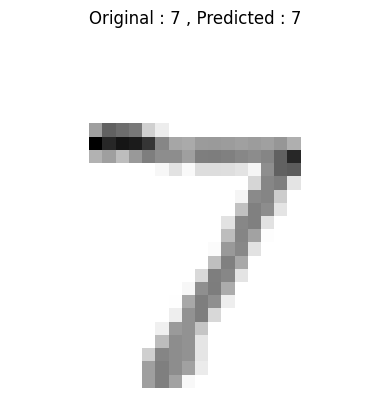

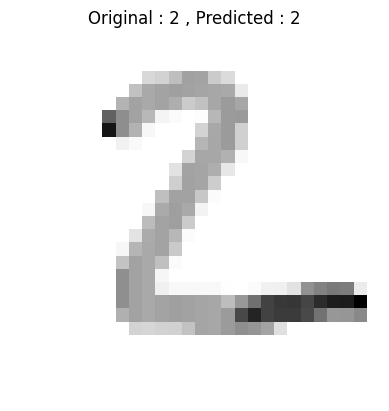

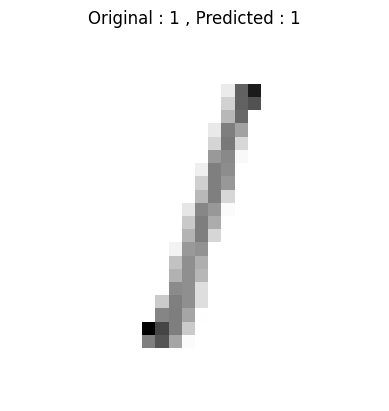

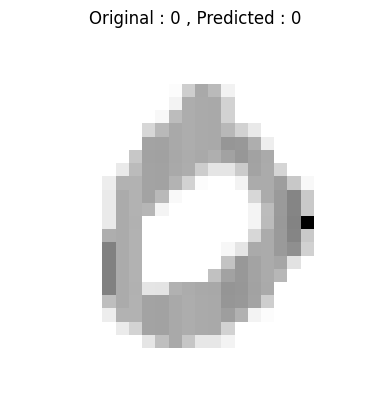

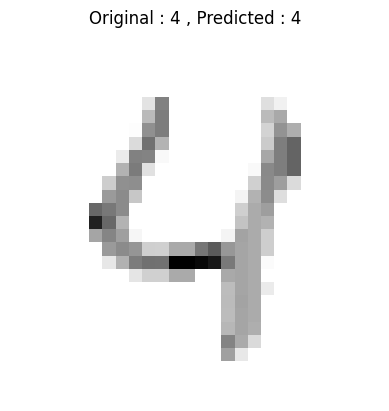

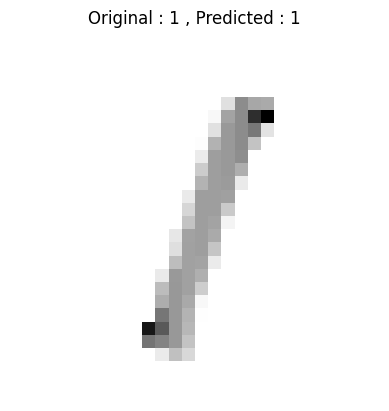

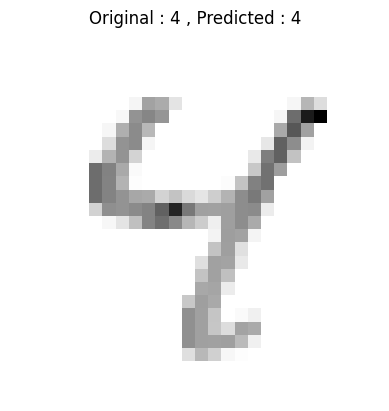

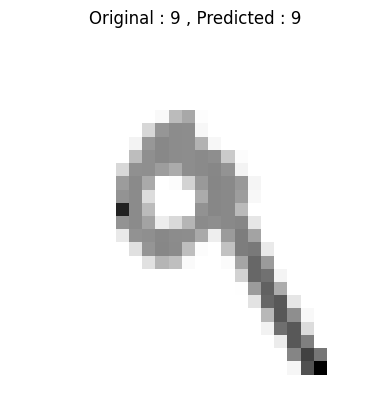

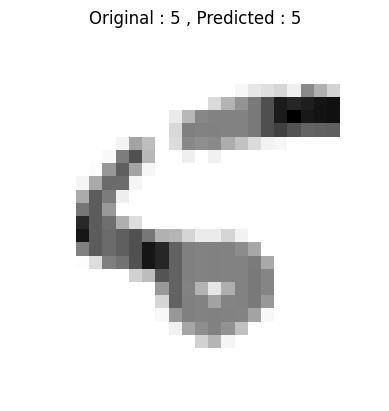

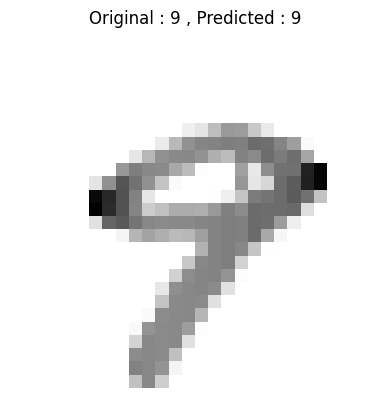

<Figure size 640x480 with 0 Axes>

In [11]:
#Visualizing Prediction
for i in range(10):
  plt.imshow(test_img[i] , cmap = 'binary')
  plt.title("Original : {} , Predicted : {}".format(test_lab[i] , p[i]))
  plt.axis("off")
  plt.figure()

In [13]:
# Generate Confusion Matrix and Analysis
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [14]:
# Evaluate the model
test_predictions = model.predict(test_img)
conf_matrix = confusion_matrix(test_lab, np.argmax(test_predictions, axis=1))

313/313 [==============================] - 2s 6ms/step


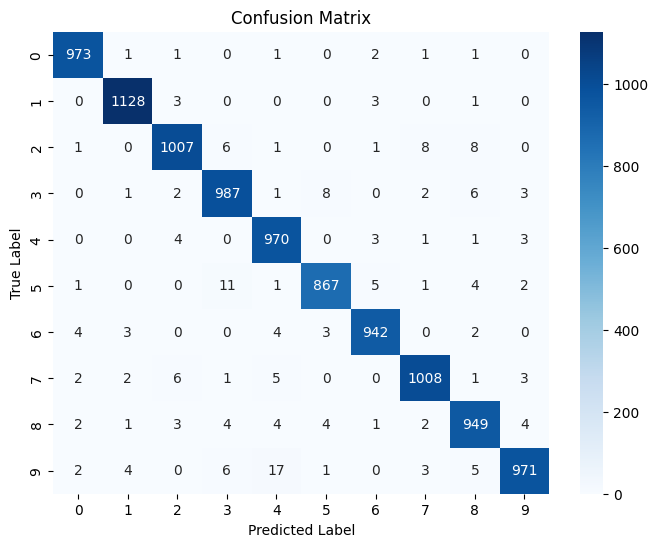

In [15]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
# Analyze the confusion matrix
classification_rep = classification_report(test_lab, np.argmax(test_predictions, axis=1))
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
# Fitting Model
model.fit(train_img, train_lab, epochs=10)

# Evaluation of Model
accuracy = model.evaluate(test_img, test_lab)[1]
print("Model Accuracy:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0177 - accuracy: 0.9944
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0131 - accuracy: 0.9961
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0101 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0089 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0107 - accuracy: 0.9968
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss